# Import Data

In [ ]:
# Loading the data

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

mon_features_modified = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive//Machine_Learning/mon_labels.csv')

Mounted at /content/drive


# Building Random Forest Model

In [ ]:
# Define scaler functions to use data
from sklearn.preprocessing import StandardScaler
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

In [ ]:
# Split the dataset (train:test=80:20).
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = mon_features_modified, mon_labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
# Use provided StandardScaler function to normalize the data
scaler_samples(X_train,X_test)

(array([[ 1.81330833,  1.81330833,  1.9266378 , ...,  0.12958667,
         -0.49275972,  0.21652348],
        [ 0.18468978,  0.18468978,  0.22123834, ...,  0.16462449,
         -0.70410901,  0.32062536],
        [-0.41791159, -0.41791159, -0.42914006, ..., -0.50887404,
          0.19667187, -0.69783809],
        ...,
        [-1.22690472, -1.22690472, -1.2092589 , ..., -1.05578009,
         -0.83151357, -0.94768262],
        [-0.86728273, -0.86728273, -0.87837051, ..., -0.11328762,
         -0.49031622,  0.01005474],
        [-0.9429597 , -0.9429597 , -0.9330157 , ..., -0.2643377 ,
         -0.55703775, -0.15477325]]),
 array([[-0.45637551, -0.45637551, -0.41908267, ..., -0.62141389,
         -0.62855967, -0.52606998],
        [-0.27093565, -0.27093565, -0.36209074, ..., -0.14791805,
          0.50507413, -0.37859231],
        [-1.28913496, -1.28913496, -1.26859755, ..., -0.95666359,
         -0.45383884, -0.87654633],
        ...,
        [-1.15498032, -1.15498032, -1.13919236, ..., -

# Experiment 1 : Finding Unnecessary Features

In [ ]:
# Train the RandomForest model using training data.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1
)


clf.fit(X_train, y_train)

<ipython-input-5-de005ae7899c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1)

In [ ]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.7760526315789473
Confusion Matrix
 [[27  0  0 ...  1  0  0]
 [ 0 32  1 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 1  0  0 ... 32  0  1]
 [ 0  0  0 ...  0 34  0]
 [ 2  0  0 ...  0  0 29]]


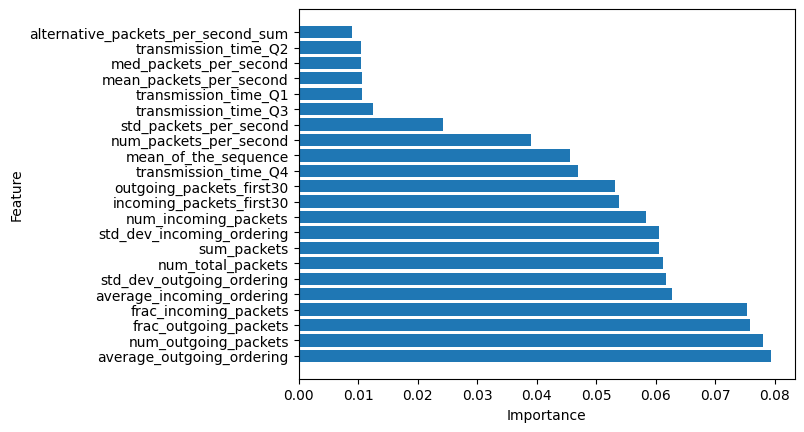

In [ ]:
#Graph feature importance
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = clf.feature_importances_

# Sort by mapping importance to attribute names
feature_names = X.columns
feature_importance = list(zip(feature_names, feature_importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Visualization
features, importances = zip(*feature_importance)
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#Drop features of low importance
mon_features2 = mon_features_modified.drop(['alternative_packets_per_second_sum', 'transmission_time_Q2','med_packets_per_second','transmission_time_Q1','mean_packets_per_second'], axis=1)

In [ ]:
# Split the dataset (train:test=80:20).
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = mon_features2, mon_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Use provided StandardScaler function to normalize the data
scaler_samples(X_train,X_test)

(array([[ 1.81330833,  1.81330833,  1.9266378 , ..., -0.84293271,
          1.95725064, -0.49275972],
        [ 0.18468978,  0.18468978,  0.22123834, ..., -0.64948961,
          0.23720831, -0.70410901],
        [-0.41791159, -0.41791159, -0.42914006, ...,  0.87593119,
         -0.57731572,  0.19667187],
        ...,
        [-1.22690472, -1.22690472, -1.2092589 , ..., -1.37334121,
         -0.56734555, -0.83151357],
        [-0.86728273, -0.86728273, -0.87837051, ..., -0.55872452,
         -0.53305935, -0.49031622],
        [-0.9429597 , -0.9429597 , -0.9330157 , ..., -1.00063705,
         -0.40545813, -0.55703775]]),
 array([[-0.45637551, -0.45637551, -0.41908267, ...,  0.55201328,
         -0.55295617, -0.62855967],
        [-0.27093565, -0.27093565, -0.36209074, ...,  0.68078625,
         -0.51367149,  0.50507413],
        [-1.28913496, -1.28913496, -1.26859755, ..., -1.06133621,
         -0.79272736, -0.45383884],
        ...,
        [-1.15498032, -1.15498032, -1.13919236, ..., -

In [ ]:
# Train the Random Forest model using training data.
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1
)

clf2.fit(X_train, y_train)

<ipython-input-10-557adb3a6240>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1)

In [ ]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf2.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.7805263157894737
Confusion Matrix
 [[27  0  0 ...  0  0  0]
 [ 0 31  1 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 1  0  0 ... 31  0  1]
 [ 0  0  0 ...  0 34  0]
 [ 2  0  0 ...  0  0 30]]


# Conclusion of the Experiment 1
: When features with importance less than 0.01 were removed, it was confirmed that the accuracy slightly increased. Therefore, in subsequent experiments, the corresponding features were removed.

# Experiment 2 : Find the Appropriate Class_Weight

In [ ]:
#Shows accuracy by class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
class_accuracy_list = [(i, acc) for i, acc in enumerate(class_accuracy)]
sorted_classes = sorted(class_accuracy_list, key=lambda x: x[1])

for cls, acc in sorted_classes:
    print(f"Class {cls} Accuracy: {acc}")

Class 24 Accuracy: 0.4883720930232558
Class 13 Accuracy: 0.5135135135135135
Class 37 Accuracy: 0.5405405405405406
Class 77 Accuracy: 0.5555555555555556
Class 89 Accuracy: 0.5681818181818182
Class 21 Accuracy: 0.5813953488372093
Class 22 Accuracy: 0.5813953488372093
Class 79 Accuracy: 0.5833333333333334
Class 14 Accuracy: 0.6046511627906976
Class 32 Accuracy: 0.6170212765957447
Class 34 Accuracy: 0.6304347826086957
Class 51 Accuracy: 0.6444444444444445
Class 55 Accuracy: 0.6451612903225806
Class 84 Accuracy: 0.6451612903225806
Class 82 Accuracy: 0.6521739130434783
Class 94 Accuracy: 0.6666666666666666
Class 1 Accuracy: 0.6739130434782609
Class 90 Accuracy: 0.6739130434782609
Class 0 Accuracy: 0.675
Class 68 Accuracy: 0.6756756756756757
Class 11 Accuracy: 0.6764705882352942
Class 42 Accuracy: 0.6888888888888889
Class 31 Accuracy: 0.6896551724137931
Class 47 Accuracy: 0.6944444444444444
Class 10 Accuracy: 0.6976744186046512
Class 78 Accuracy: 0.7027027027027027
Class 16 Accuracy: 0.704545

In the experiment results below, the server was down due to the Colab environment, so the results of the experiment using another server are attached.

In [ ]:
# Visualize accuracy by class
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=False, fmt='', cmap='Blues')
plt.show()

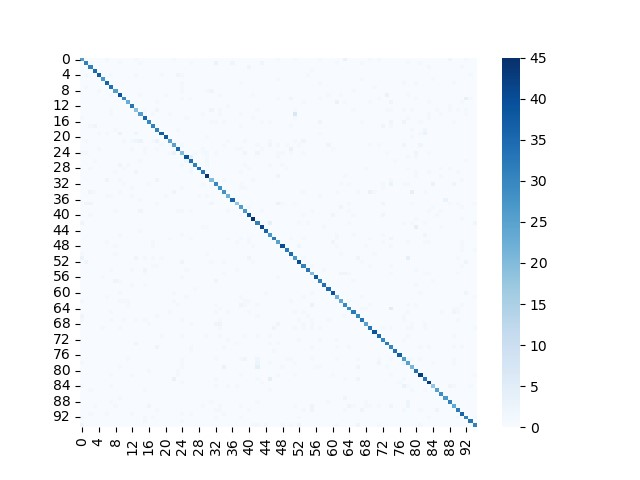

In [ ]:
# Use hyperparameter tuning with GridSearchCV to explore the grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

weight1 = 16
weight2 = 8
weight3 = 4

param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'class_weight' : ['balanced', 'balanced_subsample', {24: weight1, 77: weight2, 37: weight3, 61: weight3, 13: weight3, 55: weight3, 90: weight3, 22: weight3} ]
}

grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=3)

grid_search.fit(X_test, y_test)

crves = grid_search.cv_results_
for mean_score, params in zip(crves["mean_test_score"], crves["params"]):
    print(mean_score, params)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Best Hyperparameters: {'bootstrap': True, 'class_weight': {24: 16, 89: 8, 77: 4, 13: 4, 37: 4, 21: 4, 22: 4, 79: 4}, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best Model: RandomForestClassifier(class_weight={13: 4, 21: 4, 22: 4, 24: 16, 37: 4, 77: 4,
                                     79: 4, 89: 8},
                       criterion='entropy', n_estimators=1000, n_jobs=-1)

Accuracy: 0.7818421052631579

Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 0 32  1 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 1  0  0 ... 31  0  1]
 [ 0  0  0 ...  0 34  0]
 [ 2  0  0 ...  0  0 30]]

Class 24 Accuracy: 0.46511627906976744
Class 77 Accuracy: 0.5333333333333333
Class 13 Accuracy: 0.5405405405405406
Class 37 Accuracy: 0.5405405405405406
Class 89 Accuracy: 0.5454545454545454
Class 21 Accuracy: 0.5581395348837209
Class 22 Accuracy: 0.5813953488372093
Class 79 Accuracy: 0.5833333333333334
Class 34 Accuracy: 0.6086956521739131
Class 32 Accuracy: 0.6170212765957447
Class 51 Accuracy: 0.6444444444444445
Class 55 Accuracy: 0.6451612903225806
Class 84 Accuracy: 0.6451612903225806
Class 14 Accuracy: 0.6511627906976745
Class 94 Accuracy: 0.6666666666666666
Class 0 Accuracy: 0.675
Class 68 Accuracy: 0.6756756756756757
Class 11 Accuracy: 0.6764705882352942
Class 69 Accuracy: 0.6875
Class 31 Accuracy: 0.6896551724137931
Class 47 Accuracy: 0.6944444444444444
Class 1 Accuracy: 0.6956521739130435
Class 82 Accuracy: 0.6956521739130435
Class 90 Accuracy: 0.6956521739130435
Class 62 Accuracy: 0.696969696969697
Class 10 Accuracy: 0.6976744186046512
Class 78 Accuracy: 0.7027027027027027
Class 16 Accuracy: 0.7045454545454546
Class 63 Accuracy: 0.7045454545454546
Class 42 Accuracy: 0.7111111111111111
Class 39 Accuracy: 0.717948717948718
Class 64 Accuracy: 0.717948717948718
Class 65 Accuracy: 0.7272727272727273
Class 74 Accuracy: 0.7317073170731707
Class 67 Accuracy: 0.7333333333333333
Class 46 Accuracy: 0.7441860465116279
Class 19 Accuracy: 0.7551020408163265
Class 27 Accuracy: 0.7692307692307693
Class 92 Accuracy: 0.775
Class 29 Accuracy: 0.7804878048780488
Class 8 Accuracy: 0.78125
Class 61 Accuracy: 0.7857142857142857
Class 23 Accuracy: 0.7872340425531915
Class 35 Accuracy: 0.7931034482758621
Class 9 Accuracy: 0.8
Class 52 Accuracy: 0.8
Class 54 Accuracy: 0.8048780487804879
Class 91 Accuracy: 0.8095238095238095
Class 66 Accuracy: 0.8108108108108109
Class 81 Accuracy: 0.8113207547169812
Class 40 Accuracy: 0.8125
Class 57 Accuracy: 0.8157894736842105
Class 88 Accuracy: 0.8157894736842105
Class 43 Accuracy: 0.8163265306122449
Class 48 Accuracy: 0.8163265306122449
Class 33 Accuracy: 0.8181818181818182
Class 71 Accuracy: 0.8181818181818182
Class 17 Accuracy: 0.8205128205128205
Class 45 Accuracy: 0.8235294117647058
Class 4 Accuracy: 0.8260869565217391
Class 26 Accuracy: 0.8292682926829268
Class 25 Accuracy: 0.8297872340425532
Class 85 Accuracy: 0.8333333333333334
Class 28 Accuracy: 0.8372093023255814
Class 38 Accuracy: 0.8387096774193549
Class 60 Accuracy: 0.8478260869565217
Class 6 Accuracy: 0.8571428571428571
Class 15 Accuracy: 0.8571428571428571
Class 72 Accuracy: 0.8571428571428571
Class 18 Accuracy: 0.8611111111111112
Class 53 Accuracy: 0.8648648648648649
Class 73 Accuracy: 0.8648648648648649
Class 50 Accuracy: 0.875
Class 2 Accuracy: 0.8857142857142857
Class 7 Accuracy: 0.8918918918918919
Class 30 Accuracy: 0.8979591836734694
Class 5 Accuracy: 0.9
Class 87 Accuracy: 0.9
Class 58 Accuracy: 0.918918918918919
Class 36 Accuracy: 0.925
Class 56 Accuracy: 0.926829268292683
Class 83 Accuracy: 0.9347826086956522
Class 49 Accuracy: 0.9411764705882353
Class 12 Accuracy: 0.9428571428571428
Class 75 Accuracy: 0.9444444444444444
Class 80 Accuracy: 0.9444444444444444
Class 20 Accuracy: 0.95
Class 41 Accuracy: 0.9574468085106383
Class 93 Accuracy: 0.9714285714285714
Class 3 Accuracy: 0.9722222222222222
Class 59 Accuracy: 0.9722222222222222
Class 44 Accuracy: 0.972972972972973
Class 76 Accuracy: 0.972972972972973
Class 70 Accuracy: 1.0
Class 86 Accuracy: 1.0


In [ ]:
sns.heatmap(conf_matrix, annot=False, fmt='', cmap='Reds')
plt.show()

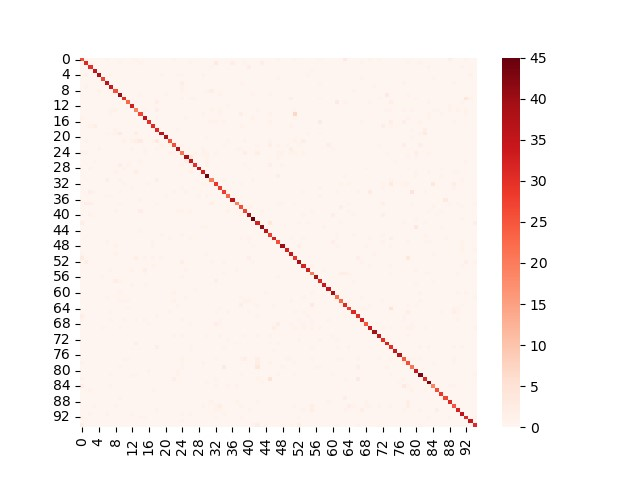

# Conclusion of the Experiment 2
: We attempted to add weights according to classes with low accuracy, but the experimental results showed no significant difference. So we decided to use 'balanced'.

# Experiment 3 : Hyperparameter Tuning with GridSearchCV

In [ ]:
# Use hyperparameter tuning with GridSearchCV to explore the grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [1000, 3000, 2000, 4000],
    'max_depth': [200, 300, 400],
    'max_leaf_nodes' : [2000, 2500, 3000],
}

grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

grid_search.fit(X_test, y_test)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

# Conclusion of the experiment 3
: Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 300, 'max_features': 'sqrt', 'max_leaf_nodes': 2000, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 3000}
Best Model: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=300, max_leaf_nodes=2000, n_estimators=3000,
                       n_jobs=-1)
                       
Accuracy: 0.7828421052631579

Confusion Matrix:

[[27  0  0 ...  0  0  0]

 [ 0 32  1 ...  0  0  0]

 [ 0  0 31 ...  0  0  0]

 ...

 [ 1  0  0 ... 31  0  1]

 [ 0  0  0 ...  0 34  0]

 [ 2  0  0 ...  0  0 30]]



# Evaluation Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.7814197841072603

Recall: 0.7757894736842105

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63        40
           1       0.82      0.67      0.74        46
           2       0.79      0.89      0.84        35
           3       0.87      0.94      0.91        36
           4       0.89      0.85      0.87        46
           5       0.96      0.90      0.93        30
           6       0.78      0.86      0.82        42
           7       0.81      0.95      0.88        37
           8       0.75      0.84      0.79        32
           9       0.72      0.76      0.74        50
          10       0.81      0.70      0.75        43
          11       0.85      0.65      0.73        34
          12       0.85      0.94      0.89        35
          13       0.58      0.49      0.53        37
          14       0.71      0.63      0.67        43
          15       0.77      0.86      0.81        42
          16       0.83      0.68      0.75        44
          17       0.78      0.79      0.78        39
          18       0.70      0.86      0.78        36
          19       0.90      0.73      0.81        49
          20       0.84      0.95      0.89        40
          21       0.86      0.58      0.69        43
          22       0.66      0.58      0.62        43
          23       0.92      0.74      0.82        47
          24       0.44      0.40      0.41        43
          25       0.87      0.85      0.86        47
          26       0.74      0.83      0.78        41
          27       0.91      0.79      0.85        39
          28       0.97      0.84      0.90        43
          29       0.80      0.80      0.80        41
          30       0.83      0.90      0.86        49
          31       0.69      0.69      0.69        29
          32       0.64      0.62      0.63        47
          33       0.72      0.85      0.78        33
          34       0.78      0.61      0.68        46
          35       0.69      0.76      0.72        29
          36       0.95      0.90      0.92        40
          37       0.80      0.54      0.65        37
          38       0.61      0.81      0.69        31
          39       0.78      0.72      0.75        39
          40       0.77      0.83      0.80        48
          41       0.88      0.96      0.92        47
          42       0.63      0.71      0.67        45
          43       0.87      0.84      0.85        49
          44       0.92      0.97      0.95        37
          45       0.60      0.79      0.68        34
          46       0.91      0.74      0.82        43
          47       0.60      0.67      0.63        36
          48       0.89      0.80      0.84        49
          49       0.86      0.91      0.89        34
          50       0.71      0.88      0.79        40
          51       0.66      0.64      0.65        45
          52       0.80      0.80      0.80        50
          53       0.70      0.86      0.77        37
          54       0.87      0.80      0.84        41
          55       0.56      0.58      0.57        31
          56       0.95      0.93      0.94        41
          57       0.74      0.84      0.79        38
          58       0.92      0.89      0.90        37
          59       0.88      0.97      0.92        36
          60       0.86      0.80      0.83        46
          61       0.62      0.75      0.68        28
          62       0.71      0.73      0.72        33
          63       0.70      0.70      0.70        44
          64       0.78      0.72      0.75        39
          65       0.86      0.68      0.76        44
          66       0.70      0.81      0.75        37
          67       0.81      0.76      0.78        45
          68       0.83      0.65      0.73        37
          69       0.80      0.73      0.76        48
          70       0.93      1.00      0.96        39
          71       0.85      0.77      0.81        44
          72       0.73      0.86      0.79        35
          73       0.82      0.86      0.84        37
          74       0.55      0.73      0.62        41
          75       0.97      0.92      0.94        36
          76       0.95      0.97      0.96        37
          77       0.63      0.58      0.60        45
          78       0.53      0.73      0.61        37
          79       0.62      0.58      0.60        36
          80       0.69      0.94      0.80        36
          81       0.82      0.79      0.81        53
          82       0.74      0.63      0.68        46
          83       0.78      0.93      0.85        46
          84       0.68      0.61      0.64        31
          85       0.83      0.83      0.83        30
          86       0.83      1.00      0.91        29
          87       0.87      0.90      0.89        30
          88       0.79      0.82      0.81        38
          89       0.64      0.52      0.57        44
          90       0.79      0.72      0.75        46
          91       0.81      0.83      0.82        42
          92       0.70      0.78      0.74        40
          93       0.97      0.94      0.96        35
          94       0.78      0.64      0.71        45
          
    accuracy                           0.78      3800
   macro avg       0.78      0.78      0.78      3800
weighted avg       0.78      0.78      0.77      3800